In [4]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler 
import seaborn as sns
import warnings

In [5]:
clean = pd.read_excel("Clean.xlsx")

In [6]:
category = ["Price-Sensitive Customers" , "Product-Focused Customers" , "Loyalty-Driven Customers" , "Convenience-Oriented Customers"]

categories = []

for i in category:
    df = pd.read_excel("Category.xlsx" , sheet_name = i)
    categories.append(df)

In [7]:
df = categories[0]
df

,Sale Price,Shopee Discount,Discount Code by Seller,Code Coins Cashback
0,199.0,0,5,0
1,22.0,0,5,0
2,59.0,0,5,0
3,55.0,0,5,0
4,49.0,0,5,0
...,...,...,...,...
16600,35.0,0,0,0
16601,35.0,0,0,0
16602,49.0,0,0,0
16603,48.0,0,0,0


**Data Preprocessing**

In [8]:
scaler = MinMaxScaler()
for feature in df.columns:
    df[[feature]] = scaler.fit_transform(df[[feature]])

In [9]:
sse = []
k_range = range(1 , 10)
for k in k_range:
    km = KMeans(n_clusters=k)
    km.fit(df)
    sse.append(km.inertia_)

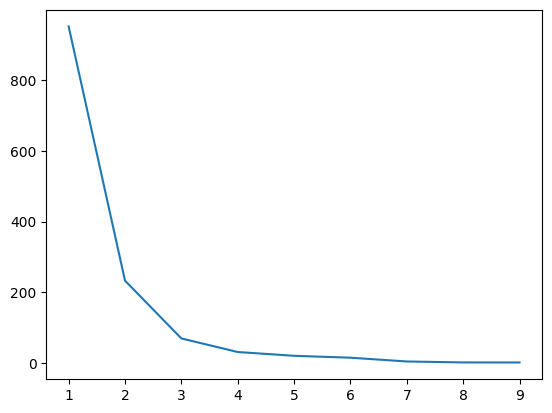

In [10]:
plt.plot(k_range , sse)

In [11]:
#4 is the elbow point
km = KMeans(n_clusters= 3)

In [12]:
km.fit(df)

KMeans(n_clusters=3)

In [13]:
y_pred = km.predict(df)

df["cluster"] = y_pred

In [14]:
cluster_list = []
for i in range(3):
    cluster_list.append(df[df["cluster"] == i])

In [15]:
cluster_list[0]

,Sale Price,Shopee Discount,Discount Code by Seller,Code Coins Cashback,cluster
183,0.003710,0.0,0.75,0.0,0
291,0.003180,0.0,1.00,0.0,0
292,0.003710,0.0,1.00,0.0,0
293,0.104928,0.0,1.00,0.0,0
294,0.009327,0.0,1.00,0.0,0
...,...,...,...,...,...
16395,0.001060,0.0,0.75,0.0,0
16396,0.009433,0.0,0.75,0.0,0
16419,0.005829,0.0,1.00,0.0,0
16555,0.031691,0.0,0.75,0.0,0


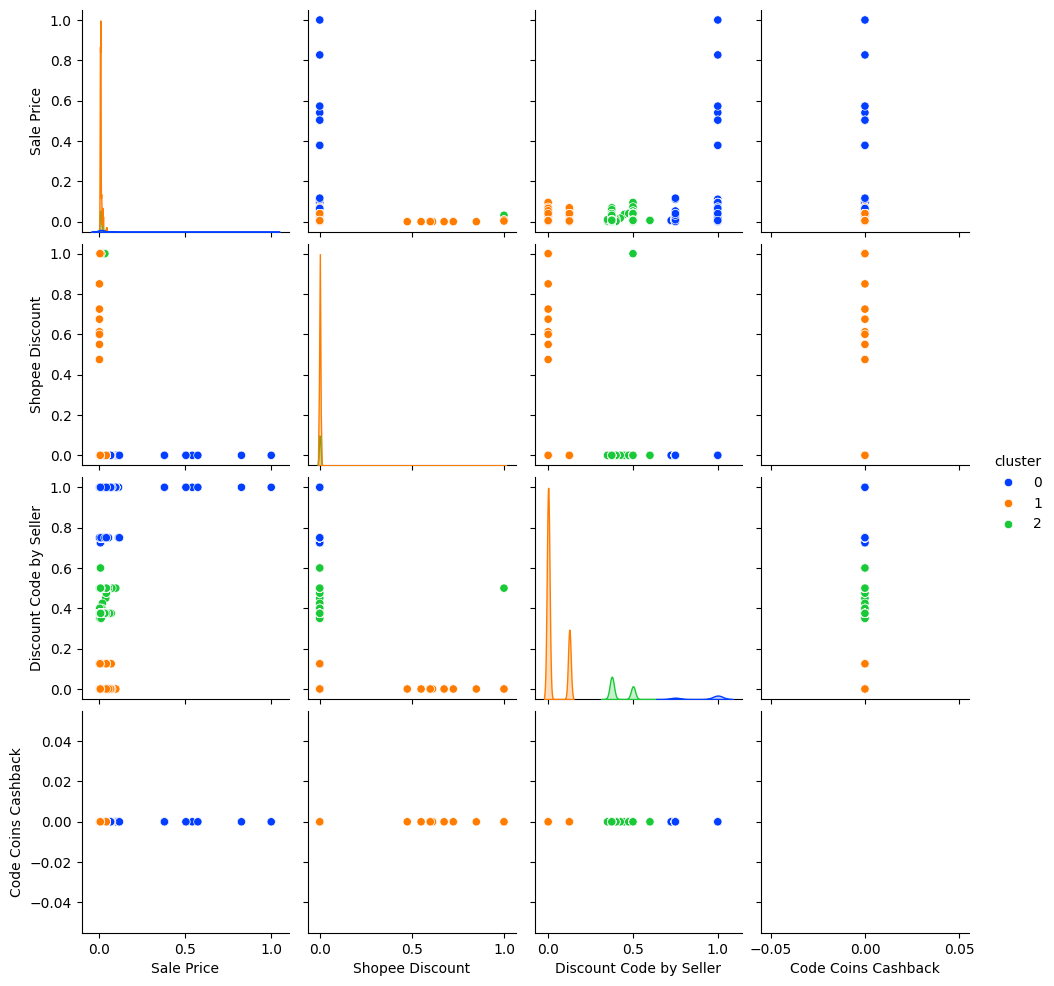

In [16]:
sns.pairplot(df , hue = "cluster" , palette = "bright")

<Axes: xlabel='Discount Code by Seller', ylabel='Sale Price'>

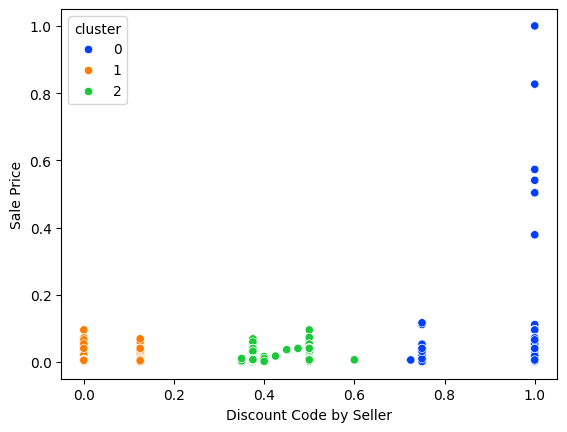

In [17]:
sns.scatterplot(data = df , x = "Discount Code by Seller" , y = "Sale Price" , hue = "cluster" , palette = "bright")

In [20]:
cat = category[0]

def add_cat(x):

    if x["cluster"] == 0:
        x[cat] = True
    else:
        x[cat] = False

    return x

df = df.apply(add_cat , axis =  1)

clean[cat] = df[cat]

In [21]:
clean.to_excel("Clean.xlsx")